In [47]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [48]:
df = pd.read_csv('Listings_sin_atipicos.csv')

In [49]:
# DF
df_inicial = pd.read_csv('Listings_sin_atipicos.csv')
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 85 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  26401 non-null  int64  
 1   listing_url                                   26401 non-null  object 
 2   last_scraped                                  26401 non-null  object 
 3   source                                        26401 non-null  object 
 4   name                                          26401 non-null  object 
 5   description                                   26401 non-null  object 
 6   neighborhood_overview                         26401 non-null  object 
 7   picture_url                                   26401 non-null  object 
 8   host_url                                      26401 non-null  object 
 9   host_name                                     26401 non-null 

In [50]:
#Eliminar Unnamed
CDMX = df_inicial.drop(['Unnamed: 0'],axis= 1)
CDMX= df_inicial.drop(['Unnamed: 0.1'], axis=1)
CDMX

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,host_host_total_listings_countname,last_scraped.1,host_since.1,calendar_last_scraped.1,first_review.1,last_review.1,Unnamed: 0,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first
0,https://www.airbnb.com/rooms/35797,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",Unknown,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,Unknown,1.0,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,Entire villa,Entire home/apt,"[""Kitchen"", ""Resort access"", ""Hot water"", ""Cou...",t,2025-06-26,1900-01-01,Unknown,f,1.0,2025-06-26,2010-06-28,2025-06-26,1900-01-01,Unknown,0,35797,20250625031918,153786,100.0,99.0,1.0,19.382830,-99.200000,2.0,1.0,1.0,1.0,1072.0,1.0,7,1.0,1.0,7.0,7.0,1.0,7.0,29,59,89,364,0.0,0.0,0.0,188,0.0,0,0.00,4.80,4.90,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0,0.0,0.00,887.0,29.200000
1,https://www.airbnb.com/rooms/44616,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,No data,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,13.0,"['email', 'phone', 'work_email']",t,t,Unknown,Cuauhtémoc,Entire home,Entire home/apt,"[""Free street parking"", ""Free parking on premi...",t,2025-07-01,2011-11-09,2025-01-01,f,13.0,2025-07-01,2010-08-09,2025-07-01,2011-11-09,2025-01-01,1,44616,20250625031918,196253,100.0,91.0,13.0,19.411620,-99.177940,2.0,1.0,1.0,1.0,1072.0,1.0,180,1.0,1.0,180.0,180.0,1.0,180.0,29,59,89,360,65.0,1.0,0.0,179,0.0,6,1080.00,4.59,4.56,4.70,4.87,4.78,4.98,4.47,9.0,4.0,2.0,0.0,0.39,4983.0,163.857534
2,https://www.airbnb.com/rooms/56074,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a few hours,f,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,San Rafael,1.0,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,Entire condo,En

In [51]:
#Formato de host_id, latitude, longitude y host_is_superhost
CDMX['host_id'] = CDMX['host_id'].astype(str)
CDMX['latitude'] = CDMX['latitude'].astype(str)
CDMX['longitude'] = CDMX['longitude'].astype(str)
CDMX['host_is_superhost_num'] = CDMX['host_is_superhost'].map({'t':1,'f':0})

In [52]:
# Tipos de habitación
print(CDMX['room_type'].value_counts())

# Sub DF
Entire_home = CDMX[CDMX['room_type'] == 'Entire home/apt']
Private_room = CDMX[CDMX['room_type'] == 'Private room']
Hotel_room = CDMX[CDMX['room_type'] == 'Hotel room']
Shared_room = CDMX[CDMX['room_type'] == 'Shared room']

room_type
Entire home/apt    17235
Private room        8867
Shared room          208
Hotel room            91
Name: count, dtype: int64


In [53]:
#Seleccionar cuantitativas de cada Sub DF
Entire_home_cuant = Entire_home.select_dtypes(['int64','float64'])
Private_room_cuant = Private_room.select_dtypes(['int64','float64'])
Hotel_room_cuant = Hotel_room.select_dtypes(['int64','float64'])
Shared_room_cuant = Shared_room.select_dtypes(['int64','float64'])

**Punto 4**

In [54]:
#Correlación Entire home
Corr_Entire_home = Entire_home_cuant.corr()
Corr_Entire_home

#Absoluto
Corr_Entire_home1= abs(Corr_Entire_home)
Corr_Entire_home1

,Unnamed: 0,id,scrape_id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first,host_is_superhost_num
Unnamed: 0,1.000000,0.959006,NaN,0.032364,0.022993,0.040464,0.000956,0.023655,0.009005,0.002941,0.039673,0.121742,0.253309,0.120267,0.083022,0.309045,0.308373,0.101806,0.311876,0.134188,0.152640,0.159128,0.150914,0.331133,0.075338,0.028202,0.160877,0.199735,0.074875,0.044587,0.035517,0.045664,0.008982,0.010401,0.005942,0.032405,0.007451,0.055296,0.004642,0.001889,NaN,0.043649,0.867060,0.867054,0.048665
id,0.959006,1.000000,NaN,0.031507,0.015034,0.040249,0.000013,0.019363,0.006347,0.003609,0.048655,0.114754,0.264308,0.116266,0.066361,0.309611,0.308014,0.086894,0.311554,0.124241,0.142893,0.149775,0.145904,0.313735,0.052405,0.028372,0.152455,0.169260,0.049267,0.025035,0.037447,0.044315,0.012835,0.009148,0.002627,0.033296,0.008148,0.054543,0.003285,0.003196,NaN,0.051405,0.814746,0.814741,0.026772
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,0.032364,0.031507,NaN,1.000000,0.037175,0.022665,0.006055,0.013420,0.007290,0.001975,0.013207,0.023599,0.007160,0.005199,0.034455,0.050224,0.055343,0.019194,0.053461,0.030379,0.032531,0.034468,0.013108,0.040616,0.045654,0.021475,0.035051,0.039363,0.051040,0.034250,0.050812,0.038691,0.053354,0.059483,0.097545,0.020424,0.031833,0.026456,0.009561,0.036516,NaN,0.050079,0.020927,0.020926,0.075525
host_acceptance_rate,0.022993,0.015034,NaN,0.037175,1.000000,0.064754,0.033886,0.005040,0.030366,0.017252,0.027415,0.059094,0.037174,0.058750,0.026765,0.054890,0.062495,0.038618,0.059276,0.026607,0.031198,0.035388,0.064405,0.009731,0.005322,0.006313,0.047961,0.007426,0.026771,0.007789,0.024353,0.007443,0.008890,0.009938,0.022839,0.006277,0.024998,0.045500,0.019509,0.036506,NaN,0.019687,0.026407,0.026405,0.038121
host_total_listings_count,0.040464,0.040249,NaN,0.022665,0.064754,1.000000,0.046185,0.044557,0.077709,0.047222,0.019686,0.084545,0.004248,0.094563,0.009990,0.016908,0.057371,0.081764,0.033285,0.070870,0.083483,0.084195,0.065831,0.022431,0.026471,0.019144,0.083086,0.029160,0.018261,0.020174,0.112334,0.109049,0.059126,0.072194,0.099766,0.014844,0.115097,0.598360,0.406258,0.158096,NaN,0.028693,0.026503,0.026505,0.026399
accommodates,0.000956,0.000013,NaN,0.006055,0.033886,0.046185,1.000000,0.394609,0.632952,0.496077,0.232923,0.044520,0.010315,0.041686,0.015120,0.027453,0.033064,0.014993,0.032303,0.059770,0.056774,0.055055,0.044969,0.046307,0.049683,0.024728,0.052396,0.046651,0.042310,0.081914,0.039967,0.037837,0.005586,0.015032,0.008799,0.008555,0.063950,0.054311,0.048810,0.049030,NaN,0.057889,0.007736,0.007738,0.024112
bathrooms,0.023655,0.019363,NaN,0.013420,0.005040,0.044557,0.394609,1.000000,0.554956,0.208066,0.368613,0.069467,0.001197,0.046835,0.094057,0.011444,0.014534,0.076184,0.015392,0.101111,0.101968,0.097158,0.083004,0.013215,0.005748,0.009767,0.093813,0.018754,0.022466,0.003101,0.075383,0.067394,0.031390,0.037869,0.032801,0.102307,0.091097,0.040293,0.049950,0.036385,NaN,0.005197,0.000496,0.000495,0.002883
bedrooms,0.009005,0.0

In [55]:
#Correlación Private_room
Corr_Private_room = Private_room_cuant.corr()
Corr_Private_room

#Absoluto
Corr_Private_room1 = abs(Corr_Private_room)
Corr_Private_room1

,Unnamed: 0,id,scrape_id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first,host_is_superhost_num
Unnamed: 0,1.000000,0.963421,NaN,0.045964,0.023038,0.140480,0.090108,0.013281,0.057394,0.004638,0.066661,0.152586,0.272103,0.152635,0.183224,0.276277,0.276610,0.195142,0.281209,0.207638,0.227197,0.232405,0.198543,0.252231,0.002938,0.047026,0.217840,0.105086,0.001589,0.006536,0.019403,0.025574,0.003372,0.001047,0.018571,0.007986,0.015960,0.124451,0.084235,0.062134,NaN,0.109330,0.787066,0.787063,0.023409
id,0.963421,1.000000,NaN,0.047136,0.028012,0.117822,0.089421,0.013108,0.049090,0.000762,0.065853,0.139673,0.277809,0.139877,0.179135,0.280888,0.284956,0.187417,0.289041,0.200375,0.219867,0.225066,0.195117,0.235540,0.014214,0.043982,0.211598,0.088103,0.009650,0.016170,0.024780,0.024359,0.001804,0.002039,0.023431,0.006231,0.012176,0.111187,0.085788,0.058278,NaN,0.109089,0.739524,0.739522,0.026874
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,0.045964,0.047136,NaN,1.000000,0.016158,0.042258,0.019196,0.008398,0.005376,0.001160,0.004910,0.037018,0.004325,0.033503,0.038129,0.003782,0.005994,0.027014,0.005184,0.043729,0.047193,0.050290,0.069985,0.049055,0.041295,0.017617,0.058639,0.036723,0.049020,0.044903,0.063027,0.061240,0.065476,0.061063,0.087997,0.056638,0.060882,0.037812,0.001408,0.003490,NaN,0.040074,0.038513,0.038517,0.075426
host_acceptance_rate,0.023038,0.028012,NaN,0.016158,1.000000,0.005060,0.009037,0.024347,0.007061,0.009641,0.039760,0.081685,0.046303,0.070908,0.057983,0.028229,0.041891,0.080424,0.035513,0.062611,0.050293,0.044347,0.029398,0.030418,0.068359,0.043371,0.033255,0.075785,0.049654,0.033698,0.020077,0.009372,0.010776,0.006119,0.004260,0.000198,0.018361,0.017506,0.004560,0.030749,NaN,0.065105,0.027105,0.027110,0.091522
host_total_listings_count,0.140480,0.117822,NaN,0.042258,0.005060,1.000000,0.110871,0.032270,0.048789,0.004339,0.033637,0.091843,0.003559,0.091735,0.085075,0.086307,0.117381,0.098324,0.101800,0.072422,0.089576,0.093820,0.102378,0.039731,0.045804,0.042885,0.087851,0.043901,0.059428,0.063221,0.177556,0.164717,0.116980,0.125910,0.163662,0.091290,0.156819,0.659887,0.294697,0.162221,NaN,0.076096,0.090209,0.090215,0.014367
accommodates,0.090108,0.089421,NaN,0.019196,0.009037,0.110871,1.000000,0.072466,0.229332,0.400553,0.216712,0.106844,0.031123,0.102638,0.174554,0.008268,0.033497,0.185545,0.013939,0.080283,0.078557,0.072961,0.047743,0.027425,0.046511,0.013011,0.063343,0.034319,0.038085,0.132101,0.071877,0.076705,0.039318,0.060047,0.078408,0.073057,0.071916,0.129647,0.095938,0.033412,NaN,0.070511,0.067865,0.067869,0.014056
bathrooms,0.013281,0.013108,NaN,0.008398,0.024347,0.032270,0.072466,1.000000,0.199219,0.061165,0.103592,0.008692,0.012280,0.011531,0.038003,0.016805,0.003547,0.033350,0.010994,0.013040,0.010384,0.010623,0.019927,0.023573,0.026381,0.012224,0.003824,0.012601,0.038992,0.054867,0.020206,0.013682,0.030426,0.017278,0.018869,0.013238,0.016098,0.076162,0.004847,0.028987,NaN,0.017521,0.019445,0.019446,0.045184
bedrooms,0.057394,0.0

In [56]:
#Correlación Hotel_room
Corr_Hotel_room = Hotel_room_cuant.corr()
Corr_Hotel_room

#Absoluto
Corr_Hotel_room1 = abs(Corr_Hotel_room)
Corr_Hotel_room1

,Unnamed: 0,id,scrape_id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first,host_is_superhost_num
Unnamed: 0,1.000000,0.978707,NaN,0.142844,0.301238,0.548710,0.359650,0.528133,0.515622,0.352527,0.041021,0.245311,0.167185,0.236918,0.314745,0.605817,0.173085,0.298331,0.117342,0.242511,0.273559,0.281902,0.120218,0.386852,0.233873,0.164366,0.209979,0.229947,0.233873,0.189640,0.071224,0.181559,0.078827,0.027381,0.117476,0.018198,0.155069,0.542744,0.419901,0.309773,NaN,0.281082,0.666009,0.665983,0.240918
id,0.978707,1.000000,NaN,0.149543,0.218931,0.602163,0.378790,0.563269,0.547271,0.367176,0.083228,0.206550,0.235463,0.195692,0.268182,0.534678,0.265041,0.255369,0.016375,0.248068,0.289930,0.301928,0.070976,0.371156,0.246278,0.163529,0.240621,0.233390,0.246278,0.203375,0.066408,0.179045,0.055902,0.055222,0.141555,0.026564,0.136269,0.597789,0.342003,0.331120,NaN,0.296274,0.565945,0.565913,0.231722
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,0.142844,0.149543,NaN,1.000000,0.451653,0.012507,0.175415,0.056577,0.040778,0.042903,0.066637,0.049515,0.016830,0.050592,0.079039,0.231914,0.192763,0.071622,0.193656,0.011107,0.049671,0.075845,0.130884,0.075221,0.045051,0.060437,0.106409,0.066185,0.045051,0.052251,0.099949,0.210683,0.311959,0.041000,0.130760,0.010396,0.152433,0.047584,0.032039,0.138026,NaN,0.039034,0.029298,0.029285,0.007171
host_acceptance_rate,0.301238,0.218931,NaN,0.451653,1.000000,0.030815,0.069814,0.106040,0.175627,0.094375,0.401594,0.050957,0.035644,0.035499,0.104594,0.360150,0.216713,0.065873,0.300893,0.100942,0.094816,0.053527,0.188562,0.130408,0.057080,0.057697,0.042605,0.042546,0.057080,0.006677,0.089504,0.197378,0.015396,0.038761,0.073913,0.173977,0.250162,0.064069,0.429216,0.023783,NaN,0.079318,0.362052,0.362049,0.001121
host_total_listings_count,0.548710,0.602163,NaN,0.012507,0.030815,1.000000,0.354728,0.385229,0.337751,0.366477,0.022230,0.100192,0.354246,0.076720,0.164547,0.358201,0.387252,0.145104,0.156113,0.283314,0.302762,0.311241,0.290045,0.236987,0.257212,0.085503,0.309539,0.254492,0.257212,0.199585,0.140181,0.039031,0.096121,0.141397,0.026713,0.045937,0.012627,0.810235,0.038713,0.328918,NaN,0.274134,0.245528,0.245506,0.293386
accommodates,0.359650,0.378790,NaN,0.175415,0.069814,0.354728,1.000000,0.548721,0.560450,0.726410,0.016819,0.125382,0.045456,0.112403,0.149140,0.278955,0.061022,0.143700,0.045631,0.159310,0.142522,0.149847,0.030955,0.305331,0.196691,0.144364,0.139221,0.210159,0.196691,0.118979,0.068869,0.089864,0.155783,0.041302,0.092322,0.130390,0.074969,0.399799,0.182067,0.364285,NaN,0.280820,0.203416,0.203405,0.193095
bathrooms,0.528133,0.563269,NaN,0.056577,0.106040,0.385229,0.548721,1.000000,0.934636,0.655675,0.013907,0.147522,0.211191,0.139766,0.171273,0.269594,0.252998,0.167379,0.084591,0.217633,0.223742,0.225059,0.013904,0.195849,0.135569,0.116796,0.189056,0.120070,0.135569,0.129649,0.079020,0.139261,0.007635,0.063945,0.110882,0.044253,0.112773,0.377533,0.228756,0.207479,NaN,0.182135,0.335093,0.335072,0.077939
bedrooms,0.515622,0.5

In [57]:
#Correlación Shared_room
Corr_Shared_room = Shared_room_cuant.corr()
Corr_Shared_room

#Absoluto
Corr_Shared_room1 = abs(Corr_Shared_room)
Corr_Shared_room1

,Unnamed: 0,id,scrape_id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first,host_is_superhost_num
Unnamed: 0,1.000000,0.976465,NaN,0.174829,0.100287,0.463782,1.300430e-01,0.052086,4.973055e-02,0.095123,0.297196,0.191109,0.102786,0.191109,0.172589,0.448927,0.425163,0.113156,0.360720,0.196404,0.167343,0.127413,0.406215,0.477880,0.156958,4.289624e-02,0.223744,0.370571,0.196817,0.217253,0.130105,0.275157,0.117760,4.737202e-02,0.126361,5.978607e-02,0.057484,0.360785,3.054382e-03,0.023162,NaN,0.021938,0.679318,0.679241,1.092679e-01
id,0.976465,1.000000,NaN,0.193566,0.105056,0.491401,1.349604e-01,0.029313,3.607867e-02,0.094221,0.260230,0.167979,0.095571,0.167979,0.184675,0.426071,0.416532,0.120501,0.335473,0.149216,0.128839,0.091553,0.399254,0.451454,0.114766,5.413404e-02,0.231236,0.326138,0.157582,0.166253,0.132757,0.259557,0.129299,5.074059e-02,0.125362,4.311857e-02,0.066980,0.390810,1.291244e-02,0.005487,NaN,0.004706,0.705259,0.705188,4.022761e-02
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,0.174829,0.193566,NaN,1.000000,0.013882,0.027902,5.306948e-02,0.204551,1.605492e-02,0.136769,0.183846,0.037989,0.147939,0.037989,0.190268,0.176138,0.281235,0.047261,0.308113,0.037236,0.009621,0.029108,0.094628,0.130469,0.033121,8.061319e-02,0.046314,0.044387,0.003104,0.048145,0.331709,0.325216,0.311189,2.510771e-01,0.279241,2.228839e-01,0.194622,0.059997,1.725657e-01,0.111249,NaN,0.042764,0.219885,0.219866,2.115398e-01
host_acceptance_rate,0.100287,0.105056,NaN,0.013882,1.000000,0.020109,5.252179e-02,0.005338,1.712410e-01,0.069898,0.036633,0.074569,0.061802,0.074569,0.003914,0.135701,0.145776,0.019888,0.151045,0.067089,0.077505,0.062551,0.197692,0.006667,0.132175,1.424942e-01,0.050457,0.047406,0.082745,0.101167,0.024476,0.004655,0.019583,1.442578e-01,0.126147,1.219373e-01,0.015688,0.042064,3.231144e-01,0.116021,NaN,0.001906,0.087339,0.087343,1.795720e-01
host_total_listings_count,0.463782,0.491401,NaN,0.027902,0.020109,1.000000,3.078627e-01,0.115221,1.662301e-02,0.156675,0.054754,0.082225,0.066304,0.082225,0.090117,0.506158,0.280934,0.177987,0.317975,0.087234,0.055720,0.007103,0.451614,0.395516,0.253328,1.293995e-01,0.227798,0.228581,0.263995,0.267027,0.090318,0.126574,0.093357,6.297176e-02,0.116675,3.048850e-02,0.050873,0.918053,1.183097e-01,0.010253,NaN,0.093272,0.311497,0.311461,2.243749e-01
accommodates,0.130043,0.134960,NaN,0.053069,0.052522,0.307863,1.000000e+00,0.243828,1.374452e-16,0.079158,0.139580,0.113979,0.140523,0.113979,0.114430,0.017893,0.203835,0.065856,0.175263,0.072391,0.004602,0.066703,0.152315,0.165921,0.101027,3.256927e-02,0.083196,0.085565,0.127453,0.128583,0.058007,0.098940,0.080325,1.289743e-02,0.025223,1.274618e-01,0.043362,0.296028,2.010931e-01,0.069111,NaN,0.012772,0.177740,0.177741,1.851215e-01
bathrooms,0.052086,0.029313,NaN,0.204551,0.005338,0.115221,2.438279e-01,1.000000,5.985056e-02,0.138759,0.068774,0.017762,0.190270,0.017762,0.122968,0.089265,0.117225,0.150658,0.055901,0.041568,0.005248,0.014058,0.152724,0.102047,0.104611,1.925794e-01,0.12854

In [58]:
#Variables a comparar
pares = [
    ("host_acceptance_rate", "host_response_rate"),
    ("review_scores_rating", "calculated_host_listings_count"),
    ("host_acceptance_rate", "price"),
    ("availability_365", "number_of_reviews"),
    ("host_acceptance_rate", "number_of_reviews"),
    ("reviews_per_month", "review_scores_communication")
]


resultados = {
    "Variable 1": [],
    "Variable 2": [],
    "Correlación": []
}

for var1, var2 in pares:
    if var1 in Entire_home_cuant.columns and var2 in Entire_home_cuant.columns:
        corr = Entire_home_cuant[[var1, var2]].corr().iloc[0, 1]
        resultados["Variable 1"].append(var1)
        resultados["Variable 2"].append(var2)
        resultados["Correlación"].append(corr)
    else:
        resultados["Variable 1"].append(var1)
        resultados["Variable 2"].append(var2)
        resultados["Correlación"].append("No existe en dataset")

# Convertir a DataFrame
tabla_correlaciones = pd.DataFrame(resultados)

tabla_correlaciones


,Variable 1,Variable 2,Correlación
0,host_acceptance_rate,host_response_rate,0.037175
1,review_scores_rating,calculated_host_listings_count,-0.105492
2,host_acceptance_rate,price,0.027415
3,availability_365,number_of_reviews,0.017335
4,host_acceptance_rate,number_of_reviews,-0.009731
5,reviews_per_month,review_scores_communication,-0.010648


In [59]:
#Variables a comparar
pares = [
    ("host_acceptance_rate", "host_response_rate"),
    ("review_scores_rating", "calculated_host_listings_count"),
    ("host_acceptance_rate", "price"),
    ("availability_365", "number_of_reviews"),
    ("host_acceptance_rate", "number_of_reviews"),
    ("reviews_per_month", "review_scores_communication")
]


resultados = {
    "Variable 1": [],
    "Variable 2": [],
    "Correlación": []
}

for var1, var2 in pares:
    if var1 in Private_room_cuant.columns and var2 in Private_room_cuant.columns:
        corr = Private_room_cuant[[var1, var2]].corr().iloc[0, 1]
        resultados["Variable 1"].append(var1)
        resultados["Variable 2"].append(var2)
        resultados["Correlación"].append(corr)
    else:
        resultados["Variable 1"].append(var1)
        resultados["Variable 2"].append(var2)
        resultados["Correlación"].append("No existe en dataset")

# Convertir a DataFrame
tabla_correlaciones = pd.DataFrame(resultados)

tabla_correlaciones

,Variable 1,Variable 2,Correlación
0,host_acceptance_rate,host_response_rate,0.016158
1,review_scores_rating,calculated_host_listings_count,-0.210086
2,host_acceptance_rate,price,0.039760
3,availability_365,number_of_reviews,0.070687
4,host_acceptance_rate,number_of_reviews,-0.030418
5,reviews_per_month,review_scores_communication,-0.083841


In [60]:
#Variables a comparar
pares = [
    ("host_acceptance_rate", "host_response_rate"),
    ("review_scores_rating", "calculated_host_listings_count"),
    ("host_acceptance_rate", "price"),
    ("availability_365", "number_of_reviews"),
    ("host_acceptance_rate", "number_of_reviews"),
    ("reviews_per_month", "review_scores_communication")
]


resultados = {
    "Variable 1": [],
    "Variable 2": [],
    "Correlación": []
}

for var1, var2 in pares:
    if var1 in Hotel_room_cuant.columns and var2 in Hotel_room_cuant.columns:
        corr = Hotel_room_cuant[[var1, var2]].corr().iloc[0, 1]
        resultados["Variable 1"].append(var1)
        resultados["Variable 2"].append(var2)
        resultados["Correlación"].append(corr)
    else:
        resultados["Variable 1"].append(var1)
        resultados["Variable 2"].append(var2)
        resultados["Correlación"].append("No existe en dataset")

# Convertir a DataFrame
tabla_correlaciones = pd.DataFrame(resultados)

tabla_correlaciones

,Variable 1,Variable 2,Correlación
0,host_acceptance_rate,host_response_rate,0.451653
1,review_scores_rating,calculated_host_listings_count,-0.067108
2,host_acceptance_rate,price,-0.401594
3,availability_365,number_of_reviews,0.248788
4,host_acceptance_rate,number_of_reviews,-0.130408
5,reviews_per_month,review_scores_communication,-0.063587


In [61]:
#Variables a comparar
pares = [
    ("host_acceptance_rate", "host_response_rate"),
    ("review_scores_rating", "calculated_host_listings_count"),
    ("host_acceptance_rate", "price"),
    ("availability_365", "number_of_reviews"),
    ("host_acceptance_rate", "number_of_reviews"),
    ("reviews_per_month", "review_scores_communication")
]


resultados = {
    "Variable 1": [],
    "Variable 2": [],
    "Correlación": []
}

for var1, var2 in pares:
    if var1 in Shared_room_cuant.columns and var2 in Shared_room_cuant.columns:
        corr = Shared_room_cuant[[var1, var2]].corr().iloc[0, 1]
        resultados["Variable 1"].append(var1)
        resultados["Variable 2"].append(var2)
        resultados["Correlación"].append(corr)
    else:
        resultados["Variable 1"].append(var1)
        resultados["Variable 2"].append(var2)
        resultados["Correlación"].append("No existe en dataset")

# Convertir a DataFrame
tabla_correlaciones = pd.DataFrame(resultados)

tabla_correlaciones

,Variable 1,Variable 2,Correlación
0,host_acceptance_rate,host_response_rate,-0.013882
1,review_scores_rating,calculated_host_listings_count,-0.065459
2,host_acceptance_rate,price,-0.036633
3,availability_365,number_of_reviews,-0.268849
4,host_acceptance_rate,number_of_reviews,-0.006667
5,reviews_per_month,review_scores_communication,-0.178008


Gráficas de dispersión

<Axes: xlabel='review_scores_rating', ylabel='calculated_host_listings_count'>

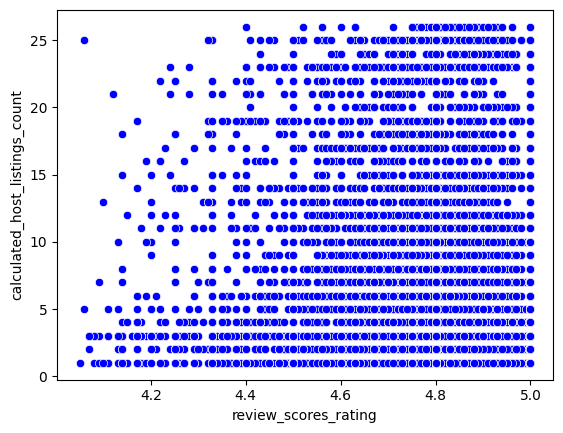

In [62]:
#Entire home/apt
sns.scatterplot(x= 'review_scores_rating', y= 'calculated_host_listings_count', color= 'blue', data= Entire_home_cuant)

<Axes: xlabel='review_scores_rating', ylabel='calculated_host_listings_count'>

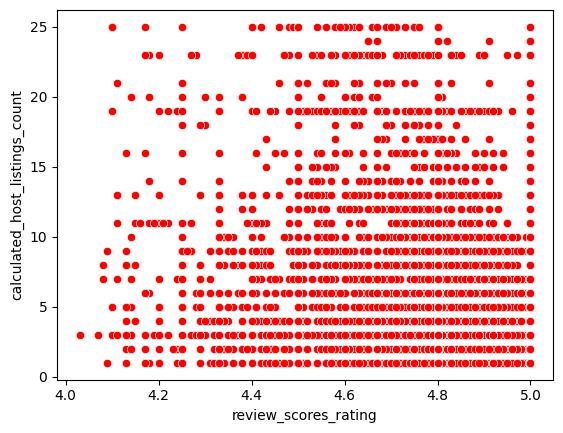

In [63]:
#Private_room
sns.scatterplot(x= 'review_scores_rating', y= 'calculated_host_listings_count', color= 'red', data= Private_room_cuant)

<Axes: xlabel='review_scores_rating', ylabel='calculated_host_listings_count'>

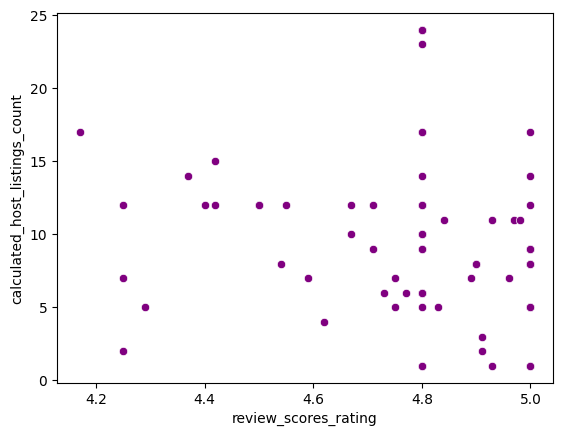

In [64]:
#Hotel room
sns.scatterplot(x= 'review_scores_rating', y= 'calculated_host_listings_count', color= 'purple', data= Hotel_room_cuant)

<Axes: xlabel='review_scores_rating', ylabel='calculated_host_listings_count'>

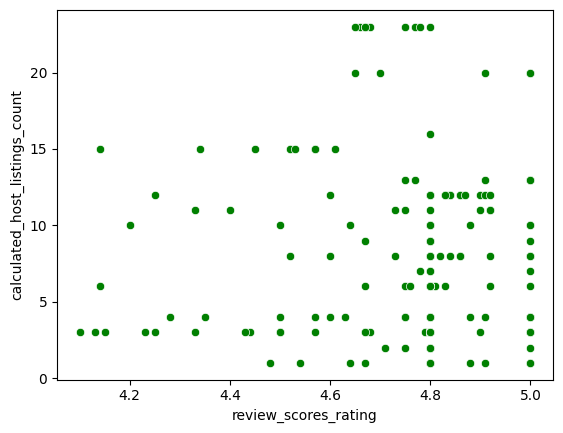

In [65]:
# Shared room
sns.scatterplot(x= 'review_scores_rating', y= 'calculated_host_listings_count', color= 'green', data= Shared_room_cuant)

**Punto 5**

In [66]:
#Correlaciones más altas
corr_matrix_entire = Corr_Entire_home1.copy()

np.fill_diagonal(corr_matrix_entire.values, np.nan)

corr_unstack_entire = corr_matrix_entire.unstack().dropna()

corr_unstack_entire = corr_unstack_entire.drop_duplicates()

top_corr_entire = corr_unstack_entire.sort_values(ascending= False).head(30)
top_corr_entire


days_since_first           months_since_first           1.000000
minimum_maximum_nights     maximum_nights_avg_ntm       0.982776
maximum_maximum_nights     maximum_nights_avg_ntm       0.981613
availability_60            availability_90              0.967741
Unnamed: 0                 id                           0.959006
minimum_maximum_nights     maximum_maximum_nights       0.955925
availability_30            availability_60              0.918097
availability_90            availability_eoy             0.874699
Unnamed: 0                 days_since_first             0.867060
                           months_since_first           0.867054
minimum_nights             minimum_minimum_nights       0.857563
availability_30            availability_90              0.844759
availability_365           availability_eoy             0.841824
number_of_reviews_ltm      estimated_occupancy_l365d    0.835440
id                         days_since_first             0.814746
                         

In [67]:
# Private room
# Identificar las correlaciones con mayor correlación 
corr_matrix_private = Corr_Private_room1.copy()

np.fill_diagonal(corr_matrix_private.values, np.nan)

corr_unstack_private = Corr_Private_room1.unstack().dropna()

corr_unstack_private = corr_unstack_private.drop_duplicates()

top_corr_private = corr_unstack_private.sort_values(ascending= False).head(30)
top_corr_private

Unnamed: 0                 Unnamed: 0                        1.000000
days_since_first           months_since_first                1.000000
minimum_maximum_nights     maximum_nights_avg_ntm            0.983392
availability_60            availability_90                   0.979783
maximum_maximum_nights     maximum_nights_avg_ntm            0.971312
Unnamed: 0                 id                                0.963421
minimum_nights             minimum_minimum_nights            0.955534
availability_30            availability_60                   0.947855
minimum_maximum_nights     maximum_maximum_nights            0.941843
availability_90            availability_eoy                  0.902855
availability_30            availability_90                   0.895728
availability_365           availability_eoy                  0.873737
number_of_reviews_ltm      estimated_occupancy_l365d         0.862802
maximum_minimum_nights     minimum_nights_avg_ntm            0.858628
availability_60     

In [68]:
# Hotel room
# Identificar las correlaciones con mayor correlación 
corr_matrix_hotel = Corr_Hotel_room1.copy()

np.fill_diagonal(corr_matrix_hotel.values, np.nan)

corr_unstack_hotel = corr_matrix_hotel.unstack().dropna()

corr_unstack_hotel = corr_unstack_hotel.drop_duplicates()

top_corr_hotel = corr_unstack_hotel.sort_values(ascending= False).head(30)
top_corr_hotel

number_of_reviews_ltm      estimated_occupancy_l365d         1.000000
days_since_first           months_since_first                1.000000
availability_60            availability_90                   0.983763
maximum_minimum_nights     minimum_nights_avg_ntm            0.981609
Unnamed: 0                 id                                0.978707
minimum_nights             minimum_minimum_nights            0.971930
availability_90            availability_eoy                  0.968035
number_of_reviews_ltm      number_of_reviews_ly              0.960736
number_of_reviews_ly       estimated_occupancy_l365d         0.960736
availability_30            availability_60                   0.949445
number_of_reviews_ly       reviews_per_month                 0.945706
bathrooms                  bedrooms                          0.934636
maximum_maximum_nights     maximum_nights_avg_ntm            0.933532
availability_60            availability_eoy                  0.928814
minimum_nights      

In [69]:
# Shared room
# Identificar las correlaciones con mayor correlación 
corr_matrix_shared = Corr_Shared_room1.copy()

np.fill_diagonal(corr_matrix_shared.values, np.nan)

corr_unstack_shared = corr_matrix_shared.unstack().dropna()

corr_unstack_shared = corr_unstack_shared.drop_duplicates()

top_corr_shared= corr_unstack_shared.sort_values(ascending= False).head(30)
top_corr_shared

minimum_nights             minimum_minimum_nights            1.000000
days_since_first           months_since_first                1.000000
Unnamed: 0                 id                                0.976465
availability_60            availability_90                   0.972604
estimated_occupancy_l365d  estimated_revenue_l365d           0.934238
availability_30            availability_60                   0.931289
maximum_maximum_nights     maximum_nights_avg_ntm            0.918786
host_total_listings_count  calculated_host_listings_count    0.918053
number_of_reviews_ltm      estimated_occupancy_l365d         0.873436
availability_30            availability_90                   0.841269
availability_90            availability_eoy                  0.786052
maximum_minimum_nights     minimum_nights_avg_ntm            0.780372
number_of_reviews_ltm      estimated_revenue_l365d           0.779685
availability_365           availability_eoy                  0.777203
availability_60     

**Punto 6 (Modelos de regresión múltiple)**

In [70]:
pd.options.display.max_columns = 100

In [71]:
#Matriz de correlación México
Mex_cuant = CDMX.select_dtypes(['int64','float64'])
Mex_corr = Mex_cuant.corr()
Mex_corr

,Unnamed: 0,id,scrape_id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,days_since_first,months_since_first,host_is_superhost_num
Unnamed: 0,1.000000,0.960946,NaN,-0.034042,0.007851,0.070408,0.032342,-0.009625,-0.004334,0.008079,0.008302,-0.126818,-0.257044,-0.127018,-0.110019,-0.294693,-0.291384,-0.127187,-0.295597,0.158456,0.178761,0.185601,0.170296,-0.295265,-0.043686,0.036592,0.182614,-0.161171,-0.043531,-0.021876,0.029518,0.040153,0.003865,-0.007412,0.002204,0.016800,-0.000334,0.076103,0.028760,-0.044237,NaN,0.069046,-0.837374,-0.837369,-0.023216
id,0.960946,1.000000,NaN,-0.033681,0.000780,0.063040,0.033225,-0.006548,-0.000557,0.006799,0.015621,-0.117735,-0.265751,-0.119917,-0.097205,-0.296219,-0.293896,-0.114331,-0.297762,0.148839,0.169333,0.176454,0.165700,-0.279007,-0.025076,0.035857,0.174761,-0.135956,-0.023304,-0.006006,0.032800,0.038826,0.008644,-0.006108,0.006071,0.018123,0.001501,0.071215,0.028568,-0.041984,NaN,0.074197,-0.787817,-0.787813,-0.007449
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,-0.034042,-0.033681,NaN,1.000000,0.031571,-0.028228,0.045331,0.023219,0.043636,0.034000,0.033852,0.044230,0.008251,0.030366,0.054655,0.041152,0.044254,0.039823,0.044163,-0.050313,-0.049279,-0.049486,-0.040212,0.057785,0.061978,0.031422,-0.050927,0.055617,0.070185,0.064159,0.059174,0.054220,0.067495,0.059921,0.093594,0.034557,0.045210,-0.031110,0.040927,-0.058234,NaN,0.066703,0.026346,0.026347,0.086074
host_acceptance_rate,0.007851,0.000780,NaN,0.031571,1.000000,0.042793,-0.012290,-0.004420,-0.009827,-0.001127,0.036630,-0.060021,0.040628,-0.057223,-0.030295,0.047005,0.056526,-0.046040,0.052443,0.035858,0.035194,0.035993,0.047671,-0.011393,-0.011453,-0.012305,0.039386,-0.020119,0.008555,-0.004041,-0.021104,-0.006149,-0.007954,-0.003015,-0.014628,0.003686,-0.020962,0.022303,0.021202,-0.037856,NaN,0.000018,-0.009963,-0.009960,-0.050169
host_total_listings_count,0.070408,0.063040,NaN,-0.028228,0.042793,1.000000,-0.005476,-0.021371,-0.059970,-0.029855,0.024183,-0.086053,0.008075,-0.093390,-0.033056,0.036802,0.079101,-0.086370,0.056189,0.071788,0.086390,0.088691,0.077768,0.027621,0.031116,0.025273,0.085300,0.032111,0.028872,0.027180,-0.133247,-0.125686,-0.077640,-0.089243,-0.119865,-0.038143,-0.126968,0.621283,0.353657,-0.007657,NaN,0.039690,-0.043324,-0.043327,0.021105
accommodates,0.032342,0.033225,NaN,0.045331,-0.012290,-0.005476,1.000000,0.383753,0.649348,0.551342,0.361541,0.086181,0.030616,0.074333,0.073206,0.072737,0.076418,0.059046,0.075955,-0.085966,-0.067154,-0.056637,-0.021455,0.116781,0.143005,0.081332,-0.041668,0.134796,0.146508,0.226533,0.013211,0.015593,0.020153,-0.026373,-0.012556,-0.032354,0.018435,-0.013597,0.140904,-0.268760,NaN,0.164187,-0.023227,-0.023234,0.071974
bathrooms,-0.009625,-0.006548,NaN,0.023219,-0.004420,-0.021371,0.383753,1.000000,0.526317,0.232588,0.296714,0.082555,0.015138,0.062541,0.114936,0.033623,0.031330,0.096370,0.035281,-0.097158,-0.089496,-0.081658,-0.049619,0.037744,0.041208,0.029449,-0.068688,0.052493,0.022164,0.057990,0.045580,0.044023,0.020400,0.0184

In [72]:
# Variables de interés en el orden dado
vars_interes = [
    "review_scores_rating", 
    "host_acceptance_rate", 
    "host_is_superhost_num", 
    "host_total_listings_count", 
    "accommodates", 
    "bedrooms", 
    "price", 
    "review_scores_value", 
    "bathrooms", 
    "reviews_per_month"
]

for var in vars_interes:
    if var in Mex_corr.columns:
        print(f"Top 3 correlaciones para: {var}\n")
        print(Mex_corr[var]
              .drop(var)                                # quitamos la variable consigo misma
              .sort_values(ascending=False, key=lambda x: abs(x)) # ordenamos por valor absoluto
              .head(3)                                  # top 3
              .to_frame(name="Correlación"))            # en formato tabla


Top 3 correlaciones para: review_scores_rating

                             Correlación
review_scores_accuracy          0.729541
review_scores_value             0.681655
review_scores_communication     0.619680
Top 3 correlaciones para: host_acceptance_rate

                        Correlación
minimum_nights            -0.060021
minimum_minimum_nights    -0.057223
maximum_maximum_nights     0.056526
Top 3 correlaciones para: host_is_superhost_num

                           Correlación
estimated_occupancy_l365d     0.351063
number_of_reviews_ltm         0.335287
number_of_reviews_ly          0.301968
Top 3 correlaciones para: host_total_listings_count

                                             Correlación
calculated_host_listings_count                  0.621283
calculated_host_listings_count_entire_homes     0.353657
review_scores_rating                           -0.133247
Top 3 correlaciones para: accommodates

           Correlación
bedrooms      0.649348
beds          0.551342
b

In [73]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep1= Mex_cuant[['review_scores_accuracy', 'review_scores_value','review_scores_communication']]
Var_Dep1= Mex_cuant['review_scores_rating']

# Define modelo
model1 = LinearRegression()

# Ajustar modelo
model1.fit(X= Vars_Indep1, y= Var_Dep1)

#Verificamos los coeficientes obtenidos para el modelo ajustado
print(model1.__dict__)

#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print(model1.score(Vars_Indep1,Var_Dep1))

#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 =model1.score(X=Vars_Indep1, y=Var_Dep1)
print('R^2: ',coef_Deter1)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1 = np.sqrt(coef_Deter1)
print('R: ',coef_Correl1) 

{'fit_intercept': True, 'copy_X': True, 'tol': 1e-06, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_accuracy', 'review_scores_value',
       'review_scores_communication'], dtype=object), 'n_features_in_': 3, 'coef_': array([0.43655169, 0.26048229, 0.28886232]), 'rank_': 3, 'singular_': array([39.43889134, 18.68111083, 15.26864209]), 'intercept_': np.float64(0.03823084894556228)}
0.6589123820611507
R^2:  0.6589123820611507
R:  0.8117341818977137


In [74]:
Vars_Indep2 = Mex_cuant[['minimum_nights','minimum_minimum_nights','maximum_maximum_nights']]
Var_Dep2 = Mex_cuant['host_acceptance_rate']

model2 = LinearRegression()
model2.fit(X=Vars_Indep2, y=Var_Dep2)

coef_Deter2 = model2.score(Vars_Indep2, Var_Dep2)
coef_Correl2 = np.sqrt(coef_Deter2)

print("R^2: ", coef_Deter2)
print("R: ", coef_Correl2)


R^2:  0.006897364870583567
R:  0.08305037549935321


In [75]:
Vars_Indep3 = Mex_cuant[['estimated_occupancy_l365d','number_of_reviews_ltm','number_of_reviews_ly']]
Var_Dep3 = Mex_cuant['host_is_superhost_num']

model3 = LinearRegression()
model3.fit(X=Vars_Indep3, y=Var_Dep3)

# Coeficiente de determinación (R²)
coef_Deter3 = model3.score(Vars_Indep3, Var_Dep3)

# Coeficiente de correlación múltiple (R)
coef_Correl3 = np.sqrt(coef_Deter3)

print("R^2: ", coef_Deter3)
print("R: ", coef_Correl3)

R^2:  0.13218365275982968
R:  0.3635706984340593


In [76]:
# y = host_total_listings_count
# x = calculated_host_listings_count (0.46), minimum_nights_avg_ntm (0.14), y review_scores_communication (-0.31)
Vars_Indep4 = Mex_cuant[['calculated_host_listings_count','calculated_host_listings_count_entire_homes','review_scores_rating']]
Var_Dep4 = Mex_cuant['host_total_listings_count']

model4 = LinearRegression()
model4.fit(X=Vars_Indep4, y=Var_Dep4)

coef_Deter4 = model4.score(Vars_Indep4, Var_Dep4)
coef_Correl4 = np.sqrt(coef_Deter4)

print("R^2: ", coef_Deter4)
print("R: ", coef_Correl4)


R^2:  0.39807898991952884
R:  0.6309350124375163


In [77]:
# y = accommodates
# x = beds (0.70), estimated_revenue_l365d (0.30), price (0.29), y bathrooms (0.26)
Vars_Indep_acc = Mex_cuant[['bedrooms','beds','price','bathrooms']]
Var_Dep_acc = Mex_cuant['accommodates']

model_acc = LinearRegression()
model_acc.fit(X=Vars_Indep_acc, y=Var_Dep_acc)

coef_Deter_acc = model_acc.score(Vars_Indep_acc, Var_Dep_acc)
coef_Correl_acc = np.sqrt(coef_Deter_acc)

print("R^2: ", coef_Deter_acc)
print("R: ", coef_Correl_acc)


R^2:  0.52733810722506
R:  0.726180492181565


In [78]:
# y = bedrooms
# x = accommodates (0.55), beds (0.50), bathrooms (0.32), y price (0.25)
Vars_Indep5 = Mex_cuant[['accommodates','beds','bathrooms','price']]
Var_Dep5 = Mex_cuant['bedrooms']

model5 = LinearRegression()
model5.fit(X=Vars_Indep5, y=Var_Dep5)

coef_Deter5 = model5.score(Vars_Indep5, Var_Dep5)
coef_Correl5 = np.sqrt(coef_Deter5)

print("R^2: ", coef_Deter5)
print("R: ", coef_Correl5)

R^2:  0.5272266061761601
R:  0.726103715853431


In [79]:
# y = Price
# x = accommodates (0.29), bedrooms (0.25), estimated_revenue_l365d (0.23), y bathrooms (0.20)
Vars_Indep6 = Mex_cuant[['accommodates','bedrooms','bathrooms']]
Var_Dep6 = Mex_cuant['price']

model6 = LinearRegression()
model6.fit(X=Vars_Indep6, y=Var_Dep6)

coef_Deter6 = model6.score(Vars_Indep6, Var_Dep6)
coef_Correl6 = np.sqrt(coef_Deter6)

print("R^2: ", coef_Deter6)
print("R: ", coef_Correl6)

R^2:  0.16963182068750193
R:  0.4118638375573922


In [80]:
Vars_Indep7 = Mex_cuant[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness']]
Var_Dep7 = Mex_cuant['review_scores_value']

model7 = LinearRegression()
model7.fit(X=Vars_Indep7, y=Var_Dep7)

coef_Deter7 = model7.score(Vars_Indep7, Var_Dep7)
coef_Correl7 = np.sqrt(coef_Deter7)

print("R^2: ", coef_Deter7)
print("R: ", coef_Correl7)

R^2:  0.5080149847929951
R:  0.7127516992564767


In [81]:
# y = bathrooms
# x = bedrooms (0.33), accommodates (0.26), y price (0.20)
Vars_Indep8 = Mex_cuant[['bedrooms','accommodates','price']]
Var_Dep8 = Mex_cuant['bathrooms']

model8 = LinearRegression()
model8.fit(X=Vars_Indep8, y=Var_Dep8)

coef_Deter8 = model8.score(Vars_Indep8, Var_Dep8)
coef_Correl8 = np.sqrt(coef_Deter8)

print("R^2:", coef_Deter8)
print("R:", coef_Correl8)

R^2: 0.2920132468962007
R: 0.540382500545864


In [82]:
# y = review_per_month
# x = number_of_reviews_ltm (0.81), estimated_occupancy_l365d (0.76), review_scores_rating (0.38), y host_response_rate (0.29)
Vars_Indep9 = Mex_cuant[['number_of_reviews_ltm','estimated_occupancy_l365d','number_of_reviews_ly','host_response_rate']]
Var_Dep9 = Mex_cuant['reviews_per_month']

model9 = LinearRegression()
model9.fit(X=Vars_Indep9, y=Var_Dep9)

coef_Deter9 = model9.score(Vars_Indep9, Var_Dep9)
coef_Correl9 = np.sqrt(coef_Deter9)

print("R^2: ", coef_Deter9)
print("R: ", coef_Correl9) 

R^2:  0.6321178025051799
R:  0.7950583642130808
